# IMPORT THE LIBRARIES

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# READ THE DATASET

In [25]:
data=pd.read_csv(r"E:\Vs\Fraud.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# DATA ANALYSIS & PREPROCESSING

In [3]:
data.shape

(6362620, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
data.duplicated().unique()

array([False])

In [7]:
for column in data[["type","nameOrig","nameDest","isFlaggedFraud","isFraud"]]:
    print(f"Column: {column}")
    print(data[column].unique())
    print("\n")

Column: type
['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


Column: nameOrig
['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']


Column: nameDest
['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']


Column: isFlaggedFraud
[0 1]


Column: isFraud
[0 1]




In [26]:
data["nameOrig"]=data["nameOrig"].str.replace("C","").astype(int)

In [27]:
data["nameDest"]=data["nameDest"].str.replace("C","")
data["nameDest"]=data["nameDest"].str.replace("M","")
data["nameDest"]=data["nameDest"].astype(int)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


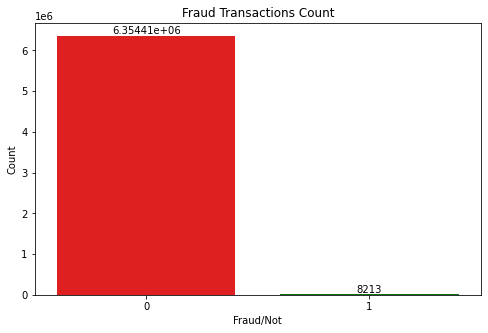

In [29]:
plt.figure(figsize=(8,5))
data1=data["isFraud"].value_counts().reset_index()
data1.columns=["isFraud","Count"]
bar1=sns.barplot(x=data1["isFraud"],y=data1["Count"],palette=['r','g'])
bar1.bar_label(bar1.containers[0])
plt.title("Fraud Transactions Count")
plt.xlabel("Fraud/Not")
plt.ylabel("Count")
plt.show()

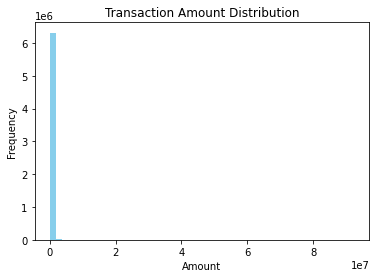

In [32]:
data['amount'].plot(kind='hist', bins=50, title='Transaction Amount Distribution', color='skyblue')
plt.xlabel('Amount')
plt.show()

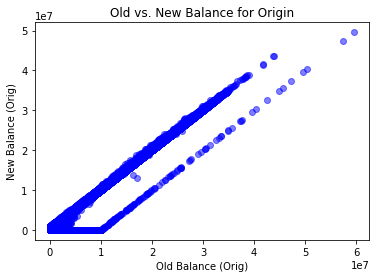

In [34]:
plt.scatter(data['oldbalanceOrg'], data['newbalanceOrig'], alpha=0.5, color='blue')
plt.title('Old vs. New Balance for Origin')
plt.xlabel('Old Balance (Orig)')
plt.ylabel('New Balance (Orig)')
plt.show()

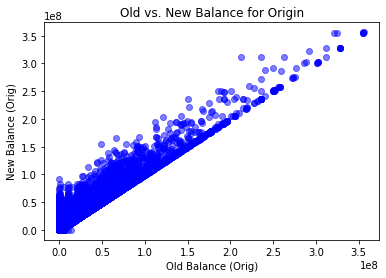

In [35]:
plt.scatter(data['oldbalanceDest'], data['newbalanceDest'], alpha=0.5, color='blue')
plt.title('Old vs. New Balance for Origin')
plt.xlabel('Old Balance (Orig)')
plt.ylabel('New Balance (Orig)')
plt.show()

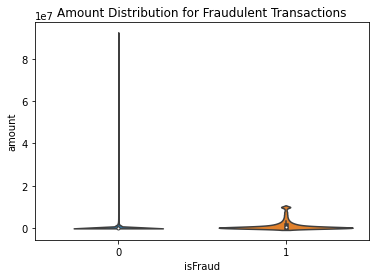

In [36]:
sns.violinplot(x='isFraud', y='amount', data=data)
plt.title('Amount Distribution for Fraudulent Transactions')
plt.show()

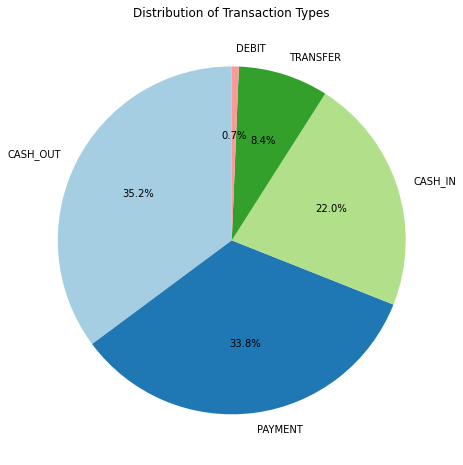

In [39]:
type_counts = data['type'].value_counts()
plt.figure(figsize=(8, 8))
type_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Transaction Types')
plt.ylabel('')  
plt.show()

In [28]:
le=LabelEncoder()
data["type"]=le.fit_transform(data["type"])

In [29]:
data=data.sample(frac=0.3,random_state=42)

# FEATURE ENGINEERING

### CORRELATION MATRIX

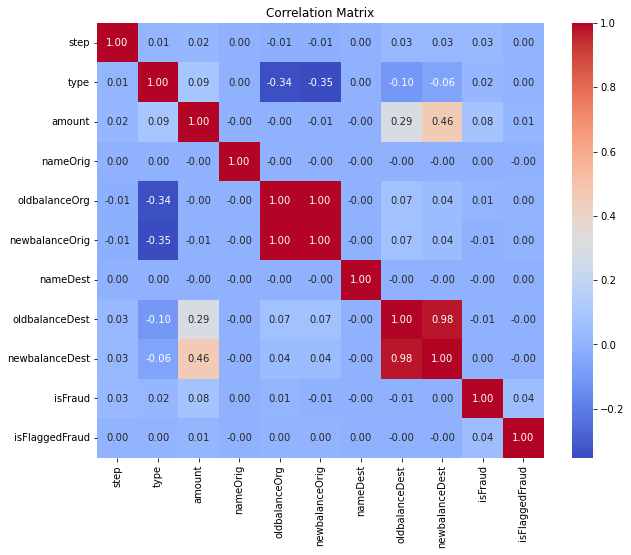

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [30]:
features=data.drop("isFraud",axis=1)
target=data["isFraud"]

In [50]:
features.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0
1,1,3,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0
2,1,4,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,0
3,1,1,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,0
4,1,3,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0


In [51]:
target.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

#### CHI SQUARE TEST

In [7]:
chi_test=chi2(features,target)


###### F-VALUE

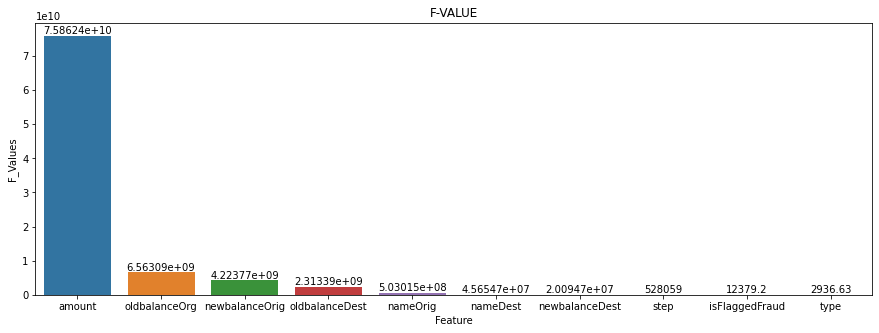

In [8]:
value1=chi_test[0]
f_value=pd.Series(value1)
f_value.index=features.columns
df1=pd.DataFrame({"Feature":f_value.index,"F_Values":f_value})
df1.sort_values(ascending=False,by="F_Values",inplace=True)
df1["F_Values"]=df1["F_Values"].round(3)
plt.figure(figsize=(15,5))
bar10=sns.barplot(x="Feature",y="F_Values",data=df1)
bar10.bar_label(bar10.containers[0])
plt.title("F-VALUE")
plt.show()

#### MUTUAL INFORMATION GAIN

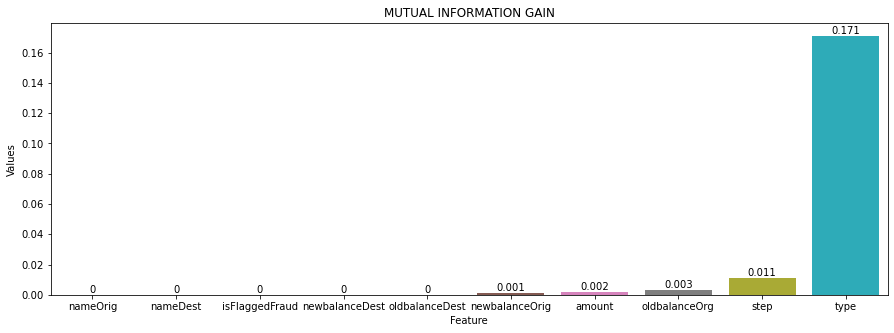

In [11]:
value3=mutual_info_classif(features,target)
mutual_info=pd.Series(value3)
mutual_info.index=features.columns
df3=pd.DataFrame({"Feature":mutual_info.index,"Values":mutual_info})
df3.sort_values(ascending=True,by="Values",inplace=True)
df3["Values"]=df3["Values"].round(3)
plt.figure(figsize=(15,5))
bar12=sns.barplot(x="Feature",y="Values",data=df3)
bar12.bar_label(bar12.containers[0])
plt.title("MUTUAL INFORMATION GAIN")
plt.show()

In [31]:
features.drop(["nameOrig","nameDest","isFlaggedFraud","newbalanceDest","oldbalanceDest"],axis=1,inplace=True)

# SPLITTING THE DATA INTO TRAINING AND TESTING DATA

In [32]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=24)

In [33]:
x_train.shape

(1336150, 5)

In [34]:
x_test.shape

(572636, 5)

# MODEL TRAINING

### RANDOM FOREST CLASSIFIER

In [36]:
model=RandomForestClassifier(n_estimators=200,max_depth=10,min_samples_split=5)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200)

In [38]:
train_pred2=model.predict(x_train)
test_pred2=model.predict(x_test)

# PERFORMANCE EVALUATION

#### ACCURACY

In [39]:
train_accuracy2=accuracy_score(train_pred2,y_train)
print("Training Accuracy- ",train_accuracy2.round(2))

Training Accuracy-  1.0


In [40]:
test_accuracy2=accuracy_score(test_pred2,y_test)
print("Test Accuracy- ",test_accuracy2.round(2))

Test Accuracy-  1.0


#### CLASSIFICATION REPORT

In [42]:
report=classification_report(test_pred2,y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    572301
           1       0.46      0.98      0.63       335

    accuracy                           1.00    572636
   macro avg       0.73      0.99      0.81    572636
weighted avg       1.00      1.00      1.00    572636



#### CONFIDENCE MATRIX

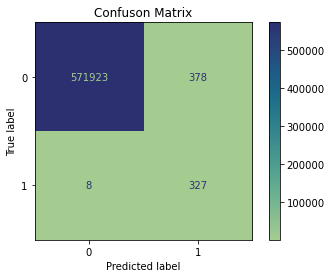

In [44]:
matrix2=confusion_matrix(test_pred2,y_test)
cm2=ConfusionMatrixDisplay(matrix2,display_labels=["0","1"])
cm2.plot(cmap="crest")
plt.title("Confuson Matrix")
plt.show()